In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('./training_v2.csv')

In [4]:
train_df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [5]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                              float64
bmi                              float64
elective_surgery                 int64
ethnicity                        object
gender                           object
height                           float64
hospital_admit_source            object
icu_admit_source                 object
icu_id                           int64
icu_stay_type                    object
icu_type                         object
pre_icu_los_days                 float64
readmission_status               int64
weight                           float64
albumin_apache                   float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative            int64
arf_apache

In [6]:
train_df_bmi = train_df[['age','ethnicity','gender','weight','height','bmi']]

In [7]:
train_df_bmi.head()

,age,ethnicity,gender,weight,height,bmi
0,68.0,Caucasian,M,73.9,180.3,22.73
1,77.0,Caucasian,F,70.2,160.0,27.42
2,25.0,Caucasian,F,95.3,172.7,31.95
3,81.0,Caucasian,F,61.7,165.1,22.64
4,19.0,Caucasian,M,NaN,188.0,NaN


In [8]:
train_df_bmi['ethnicity'] = train_df_bmi['ethnicity'].fillna('NA')
print(train_df_bmi['ethnicity'].unique())

['Caucasian' 'NA' 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


/Users/aishwarya0013/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
train_df_bmi['gender'] = train_df_bmi['gender'].fillna('NA')
print(train_df_bmi['gender'].unique())

['M' 'F' 'NA']


/Users/aishwarya0013/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
train_df_bmi = train_df_bmi.replace(np.nan, 0, regex=True)
train_df_bmi.head()

,age,ethnicity,gender,weight,height,bmi
0,68.0,Caucasian,M,73.9,180.3,22.73
1,77.0,Caucasian,F,70.2,160.0,27.42
2,25.0,Caucasian,F,95.3,172.7,31.95
3,81.0,Caucasian,F,61.7,165.1,22.64
4,19.0,Caucasian,M,0.0,188.0,0.00


In [11]:
data = train_df_bmi[['ethnicity','gender']]
onehotencoder = OneHotEncoder() 
data = onehotencoder.fit_transform(data).toarray()

In [12]:
print(data.shape)

(91713, 10)


In [13]:
data = pd.DataFrame(data)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
train_df_bmi = pd.concat([train_df_bmi,data], axis=1)

In [16]:
train_df_bmi.head()

,age,ethnicity,gender,weight,height,bmi,0,1,2,3,4,5,6,7,8,9
0,68.0,Caucasian,M,73.9,180.3,22.73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,77.0,Caucasian,F,70.2,160.0,27.42,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,25.0,Caucasian,F,95.3,172.7,31.95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,81.0,Caucasian,F,61.7,165.1,22.64,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19.0,Caucasian,M,0.0,188.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
train_df_bmi.drop(columns=['ethnicity','gender'],inplace=True)

In [18]:
train_df_bmi = train_df_bmi[['age','weight','height',0,1,2,3,4,5,6,7,8,9,'bmi']]
train_df_bmi.head()

,age,weight,height,0,1,2,3,4,5,6,7,8,9,bmi
0,68.0,73.9,180.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22.73
1,77.0,70.2,160.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.42
2,25.0,95.3,172.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.95
3,81.0,61.7,165.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22.64
4,19.0,0.0,188.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00


In [19]:
train_bmi = train_df_bmi[train_df_bmi['bmi']!=0]
test_bmi = train_df_bmi[train_df_bmi['bmi']==0]
train_bmi_x = train_bmi[['age','weight','height',0,1,2,3,4,5,6,7,8,9]]
train_bmi_y = train_bmi['bmi']
test_bmi_x = test_bmi[['age','weight','height',0,1,2,3,4,5,6,7,8,9]]
print(test_bmi_x)

        age  weight  height    0    1    2    3    4    5    6    7    8    9
4      19.0     0.0   188.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
7      70.0     0.0   165.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
8      45.0     0.0   170.2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
12     48.0     0.0   175.3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
13     65.0     0.0   172.7  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
...     ...     ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
91216  19.0    74.9     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
91327  72.0   101.6     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
91472  77.0    91.4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0
91627   0.0    69.7     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
91696  65.0    95.2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

[3429 rows x 13 columns]


In [20]:
X_train, X_val, y_train, y_val = train_test_split(train_bmi_x, train_bmi_y, test_size=0.2, random_state=0)

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = regressor.predict(X_val)

In [23]:
pred_vs_actual = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
pred_vs_actual

,Actual,Predicted
68566,27.928768,27.680813
59337,24.404819,23.572805
71472,27.409518,27.481802
30423,33.281250,32.980899
55990,24.489796,24.217968
...,...,...
26567,16.195918,14.812197
30747,32.091535,32.742766
24626,30.457762,30.690853
48584,25.420015,24.668589


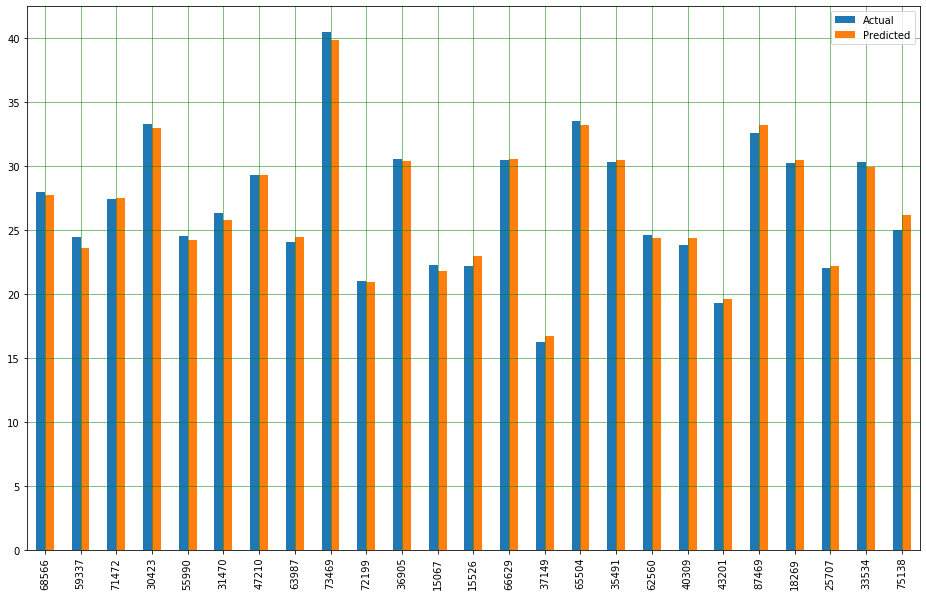

In [24]:
df1 = pred_vs_actual.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 0.7655036227465077
Mean Squared Error: 3.0564170959728396
Root Mean Squared Error: 1.748261163548753


In [26]:
y_pred_test = regressor.predict(test_bmi_x)
y_pred_test

array([-7.0493981 ,  1.62291938, -0.33867109, ..., 95.74175873,
       87.83253256, 97.27928901])

TypeError: loop of ufunc does not support argument 0 of type int which has no callable log method